<div><img src="img/logo.png" width="400"height="341"/></div>

<div style="text-align:center; color:#436784"><h1>ESTADÍSTICA INFERENCIAL CON PYTHON</h1></div>

La estadistica inferencial es como hacer un pronóstico basado en una pequeña parte de la información. En estadistica inferencial toma una muestra pequeña de datos y usas trucos pequeños matemático especiales para hacer suposiciones sobre un grupo mas grande al que pertenece esos datos. Es muy utili cuando no se puedemedir o observar todo los datos, pero quieres tener una idea de lo que pasa en general.

<div style="color:#d3ac44"><h1>Actividad de la semana 6:</h1></div>

> Se identificara los conceptos estadísticos a aplicar (Medidas de posición central, Relación
entre medias, Medidas de posición no central, Medidas de dispersión, Asimetría y
curtosis, Frecuencias y los Gráficos), para luego utilizar las librerías de Python
correspondientes para cálculo numérico y visualización, con las cuales se elaborará el
script con los gráficos embebidos.

<div style="color:#d3ac44"><h2>Descripción de Datos:</h2></div>

>El conjunto de datos "Prostate Cancer" se utiliza en análisis médicos y de salud para estudiar características relacionadas con el cáncer de próstata. Estos son los detalles de las variables más comunes que podrían encontrarse en un conjunto de datos de cáncer de próstata:

* **id:** Identificador único para cada paciente o caso.
* **diagnosis_result:** Resultado del diagnóstico, posiblemente indicando si se encontró cáncer de próstata o no.
* **radius:** Medida del radio de las células cancerosas.
* **texture:** Medida de la textura de las células cancerosas.
* **perimeter:** Perímetro de las células cancerosas.
* **area:** Área de las células cancerosas.
* **smoothness:** Característica de suavidad de las células cancerosas.
* **compactness:** Característica de compacidad de las células cancerosas.
* **symmetry:** Simetría de las células cancerosas.
* **fractal_dimension:** Dimensión fractal de las células cancerosas.

<div style="color:#d3ac44"><h2>Importacion de Datos:</h2></div>

* La palabra dataset significa literalmente conjunto de datos. Estos datos se encuentran normalmente tabulados en filas y columnas para facilitar el análisis de la información.
* Todo proyecto de inteligencia artificial debe procurar un conjunto de datos idóneo. Todos los algoritmos de análisis de datos son altamente dependientes de la calidad de la información. Si los datos son erróneos, las conclusiones que sacaremos también serán erróneas.
* A continuación se cargara Las librerias que se utilizara y de procesde hacer el proceso de limpieza exhaustivo. eliminando los valores 0 o null que podrían distorsionar el análisis y las filas con valores faltantes para asegurar que los datos sean consistentes y confiables. El conjunto de datos limpio se ha guardado en un nuevo archivo CSV.


In [176]:
# Se importan librerias.
import matplotlib.pyplot as plt         # Importar la librería para crear gráficos y visualizaciones.
import scipy.stats as sp                # Importar la librería para realizar cálculos estadísticos y pruebas.
import seaborn as sns                   # Importar la librería para crear visualizaciones estadísticas atractivas.
import pandas as pd                     # Importar la librería para manipulación y análisis de datos tabulares.
import numpy as np                      # Importar la librería para cálculos numéricos y manipulación de matrices.
import random                           # Importar el módulo para generación de números aleatorios.
import statistics

# De la librería seleccionada se importa funciones específicas
from statistics import geometric_mean, harmonic_mean   # Importar funciones específicas desde la librería 'statistics'.
from numpy import absolute, mean, median               # Importar funciones específicas desde el módulo 'numpy'.
from seaborn import displot                            # Importar la función 'displot' desde la librería 'seaborn'
from plotnine import *                                 # Importar todo desde la librería 'plotnine' (gramática de gráficos).
from scipy.stats import skew, kurtosis

In [177]:
# Importamos y creamos nuestro dataframe.

#Se crea el objeto url, definiendo la dirección web del dataset a utilizar
Url = "https://raw.githubusercontent.com/ros1992/Dataset/main/Semana%206%20Fundamento%20IA/dataset/Prostate_Cancer.csv"

# Se crea el objeto de Dataser mediante el uso de la funcion pandas.
Df_diabete = pd.read_csv(Url)

# Se crea una copia de nuestro Dataframe.
DF_copy = pd.read_csv(Url)

# En esta linea mostraremos 10 filas de nuestro Dataframe.
DF_copy.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


> Visualizamos la información general y el tamaño de nuestro dataset, hacemos uso de la la siguiente función.

In [178]:
# Se muestra la información general de nuestro Dataframe o dataset.
DF_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


Mostramos los valores que estan vacios (nulos) encontraremos true si estan nulos o falso si tiene datos.


In [179]:
# Consultamos los valores nulos del dataframe (True es nulo o NaN)
DF_copy.isnull()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


Como podemos ver no tenemos datos nulos pero si tendriamos podriamos llenae los valores nulos con un valor especificado. Puede ser una categoría específica o valores numéricos o estadísticos (media de la columan p.e.). En el caso del ejemplo llenaremos los campos nulos con la palabra ‘sin asignar’. con la Función **fillna()**. o tra forma seria llamar una funcion que permita realizar la eliminación de los registro con los valores nulos con la Función **dropna()**

<div style="color:#d3ac44"><h2>Relación entre medias:</h2></div>

> **Media Aritmética:** Es la suma de todos los valores dividida por la cantidad de valores y se utiliza ampliamente y es familiar, pero puede ser sensible a valores extremos (outliers).

> **Media Geométrica:** Es la raíz enésima del producto de todos los valores.
Se usa cuando se quiere calcular un promedio que considera el crecimiento exponencial, como en tasas de interés compuesto o crecimiento financiero.

> **Media Armónica:** Es el inverso del promedio de los inversos de los valores.
Se emplea en situaciones donde las tasas, velocidades o proporciones son importantes, ya que da más peso a valores más pequeños.La relación entre estas medias puede variar según la naturaleza de los datos. 

> **En general:** Si todos los valores son iguales, las tres medias son iguales.
En una distribución simétrica, las tres medias pueden ser similares. Si hay valores grandes y pequeños, la media geométrica tiende a ser menor que la aritmética, y la media armónica tiende a ser la más pequeña.

> La relación entre estas medias puede variar según la naturaleza de los datos. En general:

> * Si todos los valores son iguales, las tres medias son iguales.
> * En una distribución simétrica, las tres medias pueden ser similares.
> * Si hay valores grandes y pequeños, la media geométrica tiende a ser menor que la aritmética, y la media armónica tiende a ser la más pequeña.



In [180]:
# Este codigo proporciona información estadisticas del conjunto de dato. 
DF_copy.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [181]:
# Se seleccionara una columna del Dataset para sacar las estadisticas 
texture = pd.DataFrame(DF_copy, columns=["texture"])

# Se visualiza la columna del dataset
print(texture.sample(10))

    texture
16       16
95       16
12       15
57       20
23       12
98       24
94       26
83       14
44       15
32       18


> **Media armonica.** 

In [182]:
# se calcula la media armonica 
sp.hmean(texture)

array([16.8030569])

In [183]:
# otra forma de calcular la media armonica
med_arminic = len(texture) / (1 / texture).sum()
# Se visualiza la respuesta
print("Media Armonica", med_arminic)

Media Armonica texture    16.803057
dtype: float64


> **Media geométrica.** 

In [184]:
# Se calcula la media geométrica
sp.gmean(texture)

array([17.50272472])

In [185]:
# Otr forma de calcular la media geométrica
men_geome = np.exp(np.mean(np.log(texture.values)))
# Se visualiza la respuesta
print("Media Geométrica:", men_geome)

Media Geométrica: 17.502724719517452


> **Media aritmética.**

In [186]:
# Se calcula la media aritmética
np.mean(texture.values)

18.23

In [187]:
#otra forma de sacar la media aritmética es
mean_arithmetic = texture.mean()
# Se visualiza la respuesta
print("Media Aritmética:", mean_arithmetic)

Media Aritmética: texture    18.23
dtype: float64


Visualizaremos las tres medidas de centralidad: media aritmetica, media geometrica y media armonica

C:\Users\samir\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\samir\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


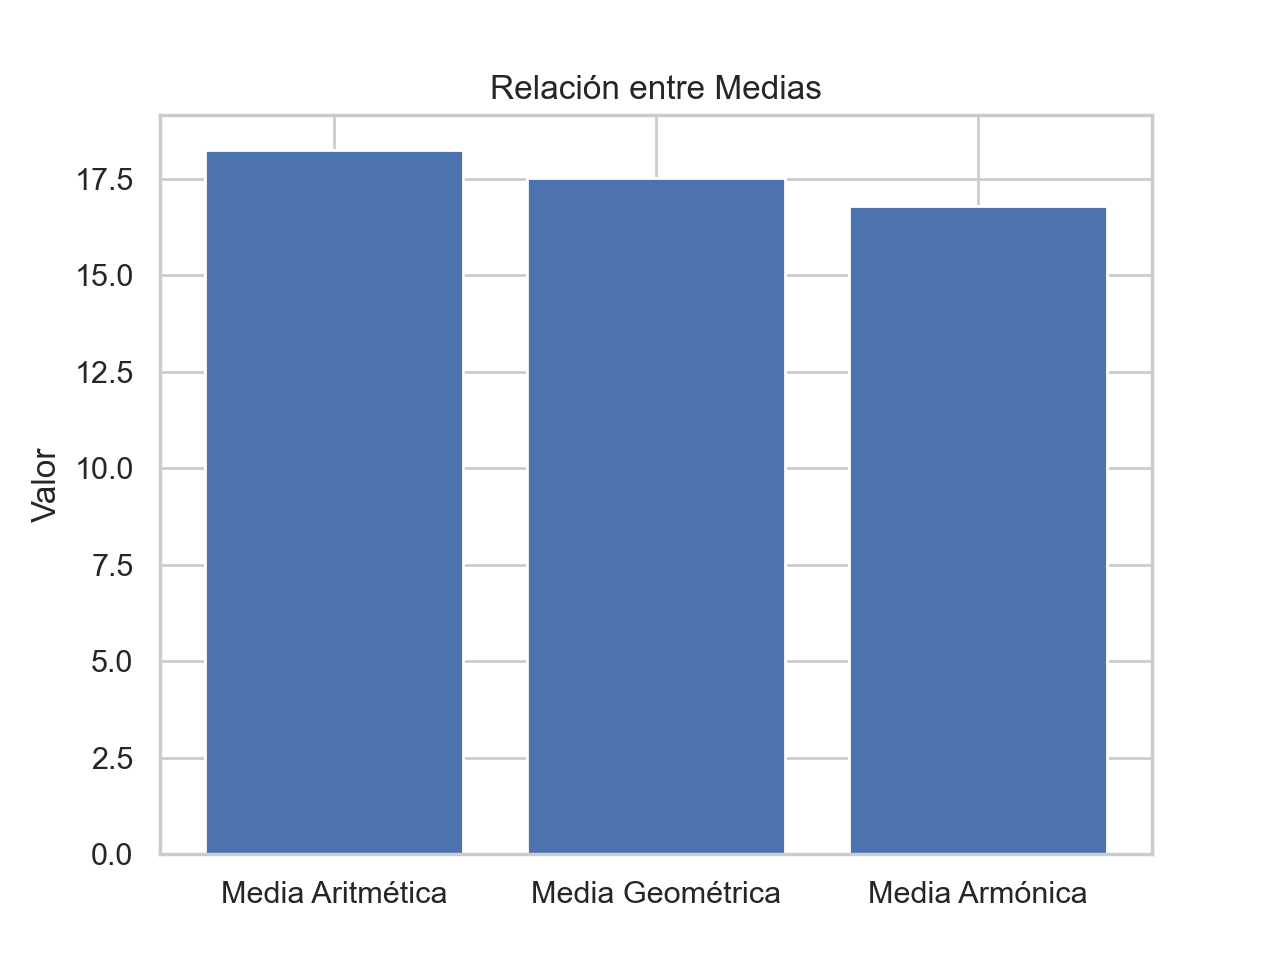

In [188]:
# Gráfico de Barras.

# Creamos un array con los nmbres de las medidas
Medidas = ['Media Aritmética', 'Media Geométrica', 'Media Armónica']
# Creamos un array llamado values con las tres medidas
Values = [mean_arithmetic, men_geome, med_arminic]


plt.bar(Medidas, Values)
plt.title('Relación entre Medias')
plt.ylabel('Valor')
plt.show()

<div style="color:#d3ac44"><h2>Medidas de posicíon no central:</h2></div>

> Las medidas de posición no central son estadísticas que no están directamente relacionadas con el valor central o promedio de un conjunto de datos. A diferencia de las medidas de posición central como la media, la mediana y la moda, las medidas de posición no central se enfocan en ubicar los datos en relación con valores específicos o porcentajes. Algunas de las medidas de posición no central más comunes son:

> **1. Cuartiles:**
> * Los cuartiles dividen los datos en cuatro partes iguales.
> * El primer cuartil (Q1) es el valor que deja el 25% de los datos por debajo.
> * El segundo cuartil (Q2), que es la mediana, deja el 50% de los datos por debajo.
> * El tercer cuartil (Q3) deja el 75% de los datos por debajo.
> * El rango intercuartílico (IQR) es la diferencia entre el tercer y el primer cuartil y se utiliza para medir la dispersión de los datos.

> **2. Percentiles:**
> * Los percentiles dividen los datos en cien partes iguales.
> * El percentil P se define como el valor que deja el P% de los datos por debajo.

> **3. Deciles:**
> * Los deciles dividen los datos en diez partes iguales.
> * El decil D se define como el valor que deja el D% de los datos por debajo.

In [189]:
# Calcular los cuartiles
q1 = np.percentile(texture, 25)
q2 = np.percentile(texture, 50)  # Mediana
q3 = np.percentile(texture, 75)

print("Primer Cuartil (Q1):", q1)
print("Segundo Cuartil (Mediana, Q2):", q2)
print("Tercer Cuartil (Q3):", q3)

Primer Cuartil (Q1): 14.0
Segundo Cuartil (Mediana, Q2): 17.5
Tercer Cuartil (Q3): 22.25


In [190]:
# Ahora Calculemos la mediana para ver si cumple con el cuartil 2 

# Calcular la mediana
median = np.median(texture)

print("Mediana:", median)

Mediana: 17.5


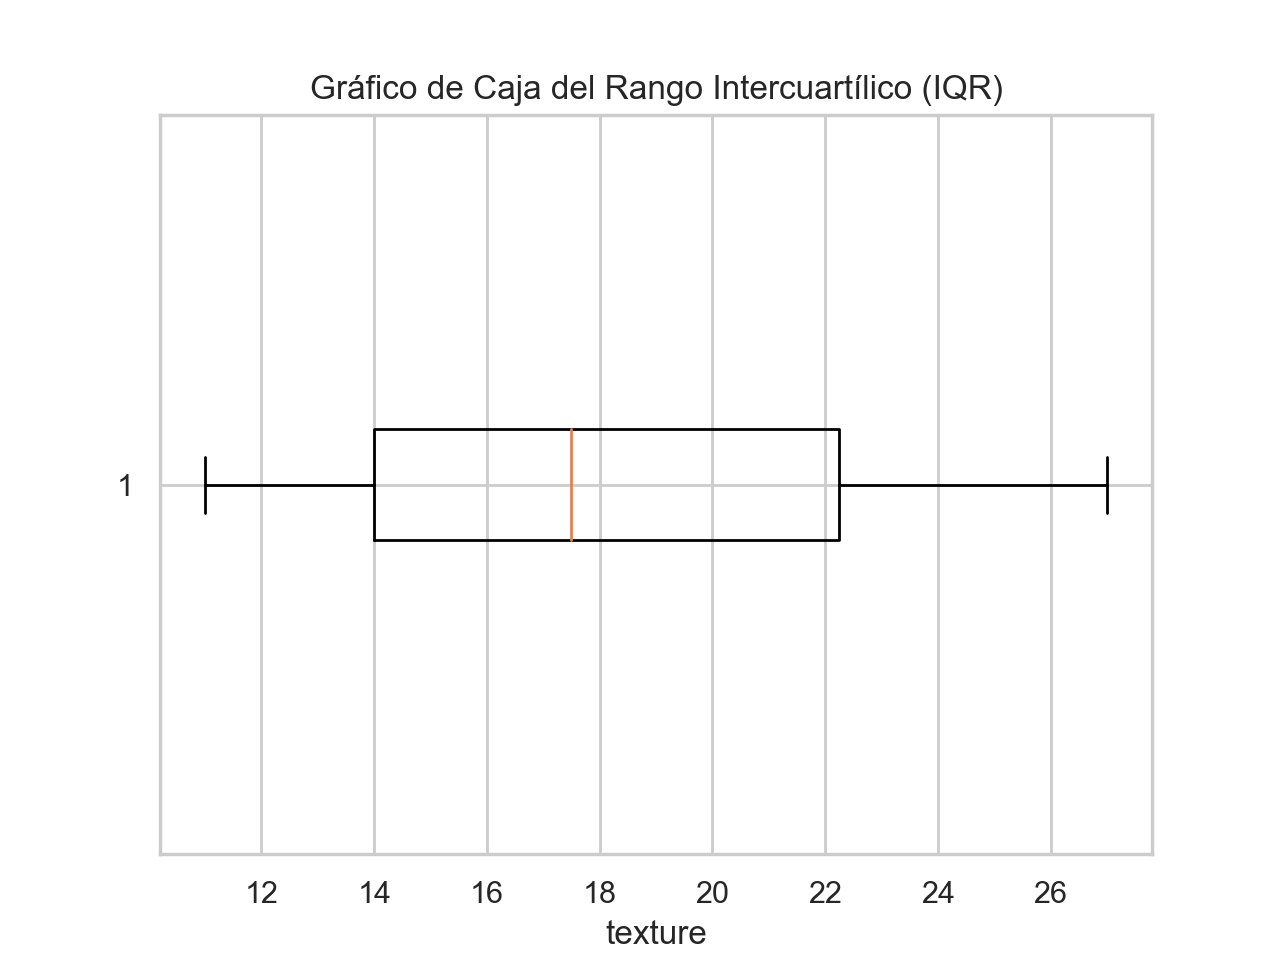

In [191]:
# Creamos un gráfico de caja para visualizar la distribución del rango intercuartílico (IQR) utilizando la librería matplotlib en Python:

plt.boxplot(texture, vert=False)
plt.xlabel('texture')
plt.title('Gráfico de Caja del Rango Intercuartílico (IQR)')
plt.show()

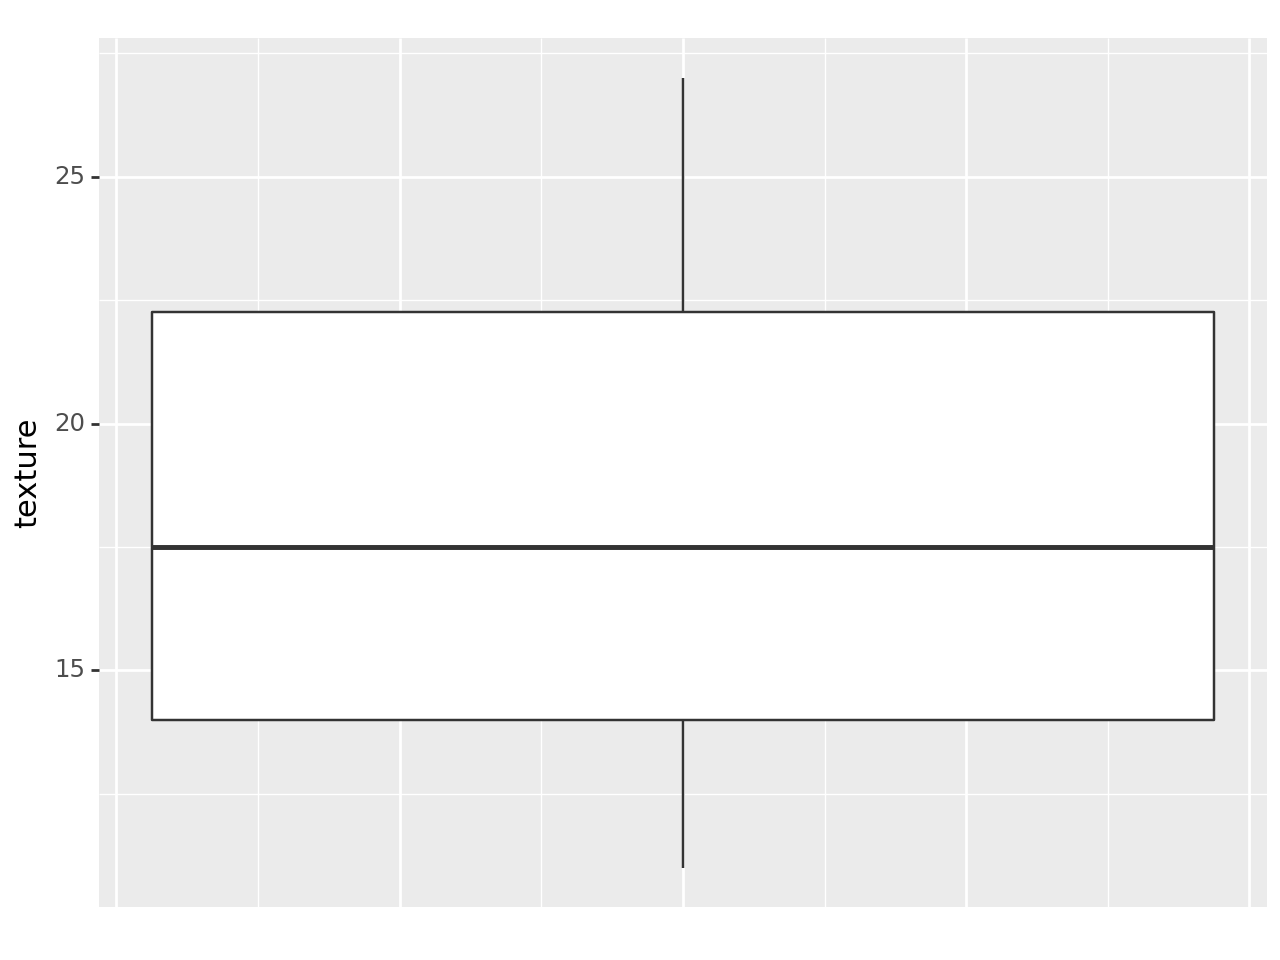

<Figure Size: (640 x 480)>

In [192]:
(ggplot(texture) + geom_boxplot(aes(x=0, y="texture")) + labs(x="") + theme(
    axis_text_x=element_blank(),
    axis_ticks_minor_x=element_blank(),
    axis_ticks_major_x=element_blank()
  ))

> **Analisis de la gráfica.**
> - La línea en el centro de la caja representa la mediana, que indica el valor que divide los datos en dos mitades. La altura de la caja muestra la dispersión de los datos en el rango intercuartílico (IQR), donde el 50% central de los datos se encuentra.
> - Observamos que la media no esta en el centro de la caja por lo tanto no es simetrica.
> - Los puntos fuera de los bigotes (limites) de la caja puede ser valores atípico
> - La altura de la caja es el Rango intercuartílico. Por lo tanto, mientras mayor sea la dispersión, más grande será la caja.




> Una de las aplicaciones más útiles de los digramas de caja es comparar visualmente una variable en distintas categorías. Por ejemplo, si queremos comparar sepal_length para las distintas species, graficaríamos las diagnosis_result en el eje de las x y texture en el eje de las y

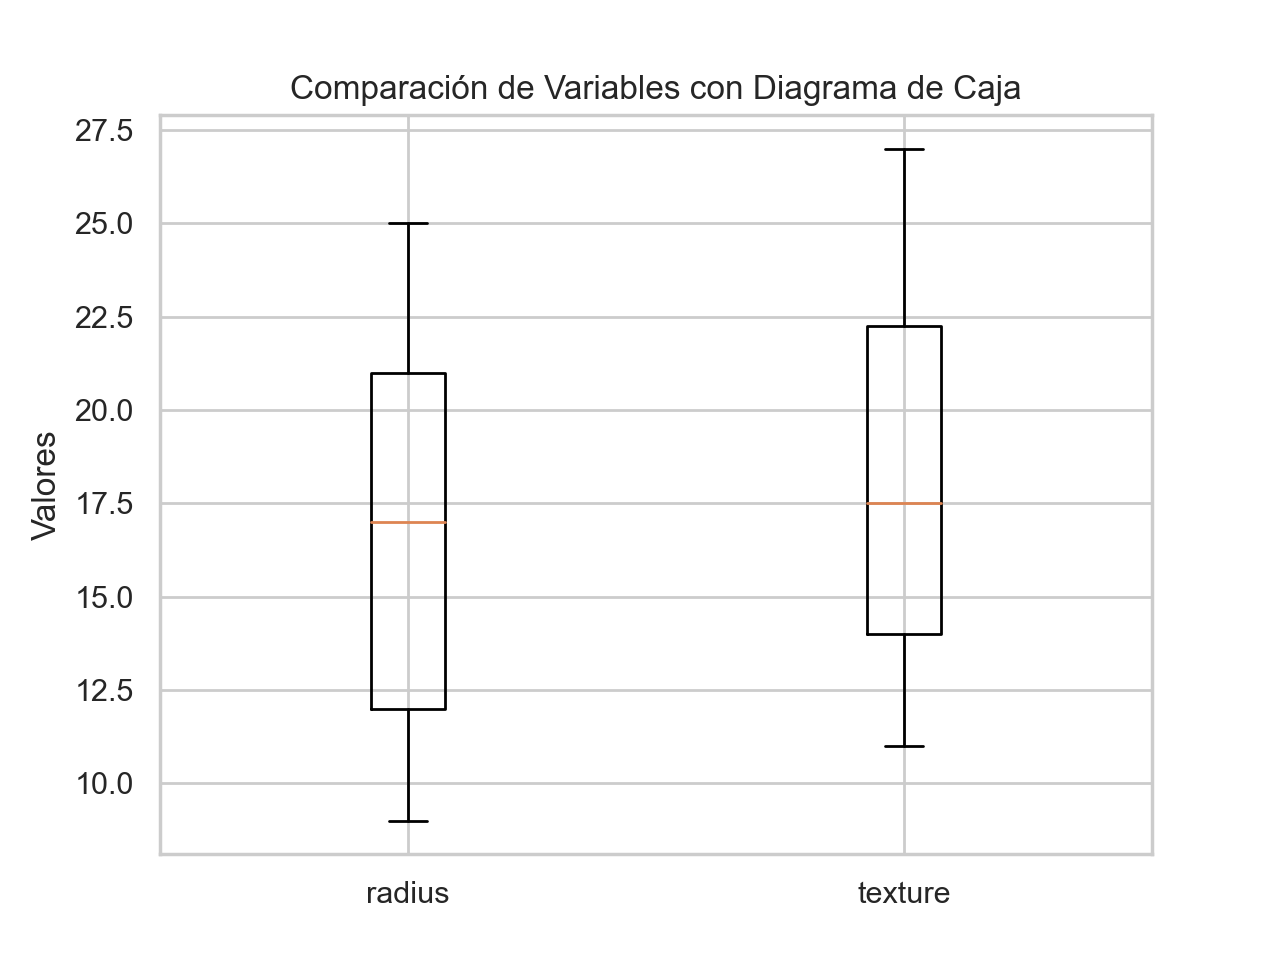

In [193]:
# Creamos dos variabes donde almacenaremos las dos columnas que vamos a comparar.
radius = Df_diabete['radius']
texture = Df_diabete['texture']

# Creamos la grafica de caja.
plt.boxplot([radius, texture], labels=['radius', 'texture'])
plt.ylabel('Valores')
plt.title('Comparación de Variables con Diagrama de Caja')
plt.show()

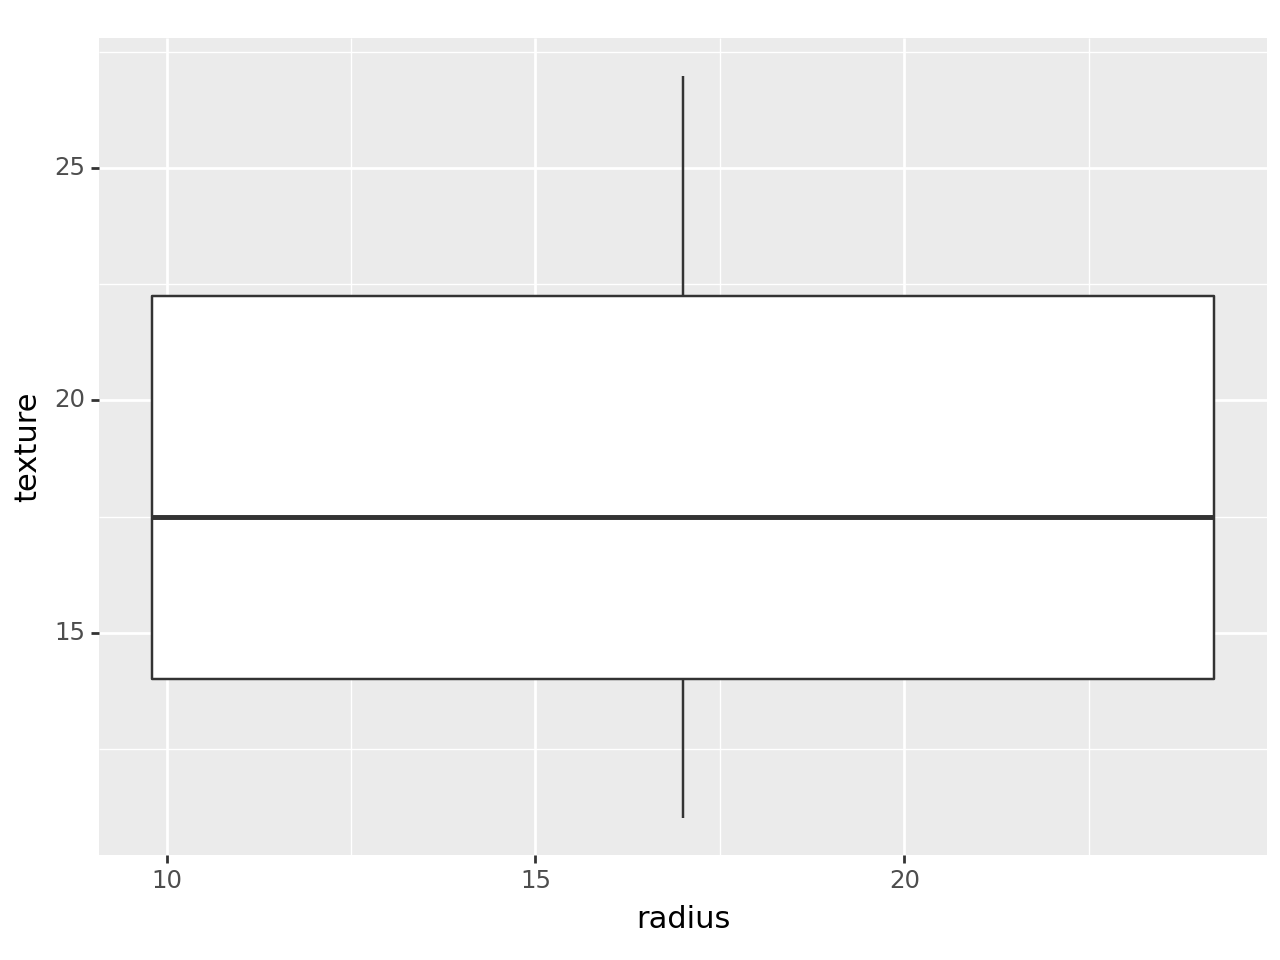

<Figure Size: (640 x 480)>

In [194]:
# se crea la gráfica para comparar las variables Species y sepal_length
(ggplot(Df_diabete) +
  geom_boxplot(aes(x="radius", y="texture")))

<h3>Deciles, Percentiles y Cuantiles</h3>

> * **Deciles.**

In [195]:
# Deciles. Los deciles dividen tus datos en diez partes iguales. Puedes calcularlos utilizando la función numpy.percentile() con diferentes valores para el parámetro q.
decile_10 = np.percentile(texture, 10)
decile_20 = np.percentile(texture, 20)
decile_30 = np.percentile(texture, 30)
# Y así sucesivamente para los diferentes deciles

print("decile 10 :", decile_10)
print("decile 20 :", decile_20)
print("decile 30 :", decile_30)

decile 10 : 12.0
decile 20 : 13.0
decile 30 : 14.0


> * **Percentiles.**

In [196]:
# Los percentiles son una medida similar a los deciles, pero puedes elegir cualquier porcentaje específico. Utiliza numpy.percentile() para calcular los percentiles.
percentil_25 = np.percentile(texture, 25)
percentil_50 = np.percentile(texture, 50)  # Mediana
percentil_75 = np.percentile(texture, 75)

print("percentil 25 :", percentil_25)
print("percentil 50 :", percentil_50)
print("percentil 75 :", percentil_75)

percentil 25 : 14.0
percentil 50 : 17.5
percentil 75 : 22.25


> * **Cuantiles:**

In [197]:
# Los cuantiles son similares a los percentiles, pero puedes elegir cualquier valor de cuantil. Utiliza numpy.quantile() para calcular los cuantiles.
cuantil_0_25 = np.quantile(texture, 0.25)
cuantil_0_5 = np.quantile(texture, 0.5)  # Mediana
cuantil_0_75 = np.quantile(texture, 0.75)
# Y así sucesivamente para los diferen

print("cuantil_0 25  :", cuantil_0_25)
print("cuantil_0 5 :", cuantil_0_5)
print("cuantil_0 75 :", cuantil_0_75)

cuantil_0 25  : 14.0
cuantil_0 5 : 17.5
cuantil_0 75 : 22.25


In [198]:
 # se calcula en cuantíl de la variable
texture.quantile()

17.5

<h3>Análisis</h3>

> * Al analizar deciles, percentiles y cuantiles, puedes obtener una comprensión detallada de cómo se distribuyen tus datos en diferentes partes o porcentajes de la muestra.
> * Los percentiles proporcionan información sobre la mediana y la ubicación de los valores centrales de los datos. La mediana (percentil 50) separa el 50% superior del 50% inferior de los valores.
> * Los cuantiles te permiten identificar valores específicos en la distribución, como los cuartiles que dividen los datos en cuatro partes iguales.

<div style="color:#d3ac44"><h2>Asimetría y Curtosis:</h2></div>

**Asimetría:**
La asimetría es una medida de la falta de simetría en una distribución de datos. Indica si la distribución es sesgada hacia la izquierda (asimetría negativa), hacia la derecha (asimetría positiva) o si es más o menos simétrica. Una distribución simétrica tiene una asimetría cercana a cero.
* Asimetría negativa: La cola de la distribución se extiende más hacia la izquierda, y la mayoría de los valores se concentran en la parte derecha de la distribución.
* Asimetría positiva: La cola de la distribución se extiende más hacia la derecha, y la mayoría de los valores se concentran en la parte izquierda de la distribución.
* Asimetría cercana a cero: Los valores tienden a estar distribuidos de manera relativamente equitativa en ambos lados de la media.

In [199]:
# Eliminar permanentemente la columna no numérica del DataFrame original
asime = Df_diabete.drop(columns=['diagnosis_result'])
# Calcular asimetría
asimetria = asime.skew()
print(asimetria)

id                   0.000000
radius              -0.054675
texture              0.293947
perimeter            0.445828
area                 0.836280
smoothness           0.463372
compactness          0.975305
symmetry             0.974503
fractal_dimension    1.153390
dtype: float64


In [200]:
print(skew(Df_diabete["texture"]))

0.2895192871321268


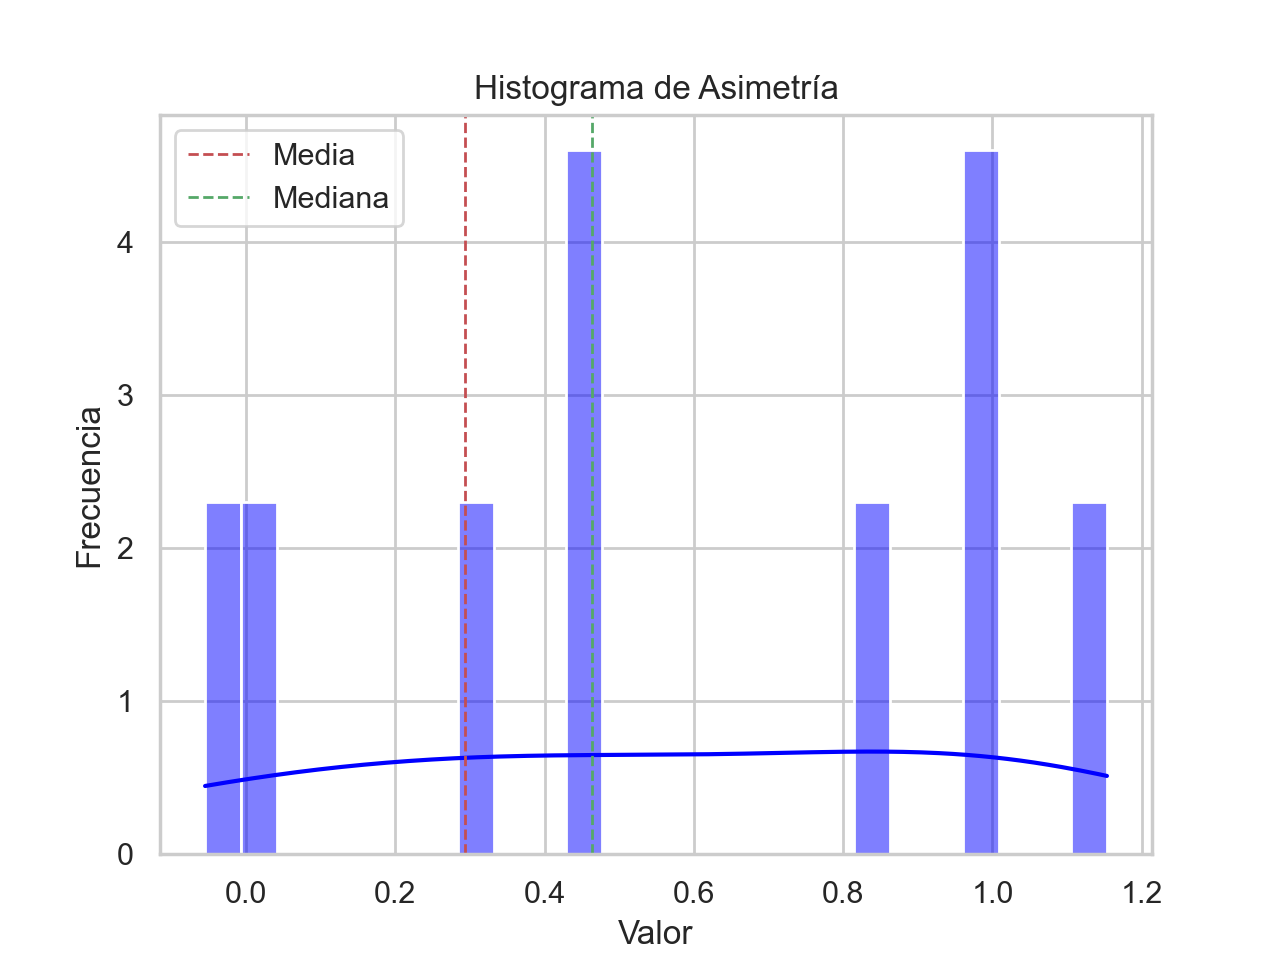

In [201]:
# Crear un histograma para visualizar la distribución
sns.set_palette("hls")
sns.histplot(asimetria, x = None, color="blue", bins=25, kde=True, stat="density", linewidth=1, )
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Asimetría')
plt.axvline(x=asimetria['texture'].mean(), color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(x=asimetria.median(), color='g', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.show()


**Curtosis:**
La curtosis es una medida de la forma de la distribución de los datos en términos de la concentración de valores en las colas en comparación con una distribución normal (curva en forma de campana). Una distribución con alta curtosis tiene colas más puntiagudas, mientras que una distribución con baja curtosis tiene colas más suaves.

* Curtosis positiva (leptocúrtica): Los valores se concentran más en el centro y las colas son más puntiagudas que en una distribución normal.
* Curtosis negativa (platicúrtica): Los valores se extienden más hacia las colas y la distribución es más achatada en el centro en comparación con una distribución normal.
* Curtosis cercana a cero (mesocúrtica): La distribución tiene una forma similar a la distribución normal, sin colas muy puntiagudas ni muy achatadas.


In [202]:
# Calcular la curtosis
curtosis_valor = kurtosis(asime['texture'])
print("Curtosis:", curtosis_valor)

Curtosis: -1.2414061414451574


In [203]:
# se aplica otra forma de funcion curtósis
sp.kurtosis(asime['texture'], fisher=False)

1.7585938585548426

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


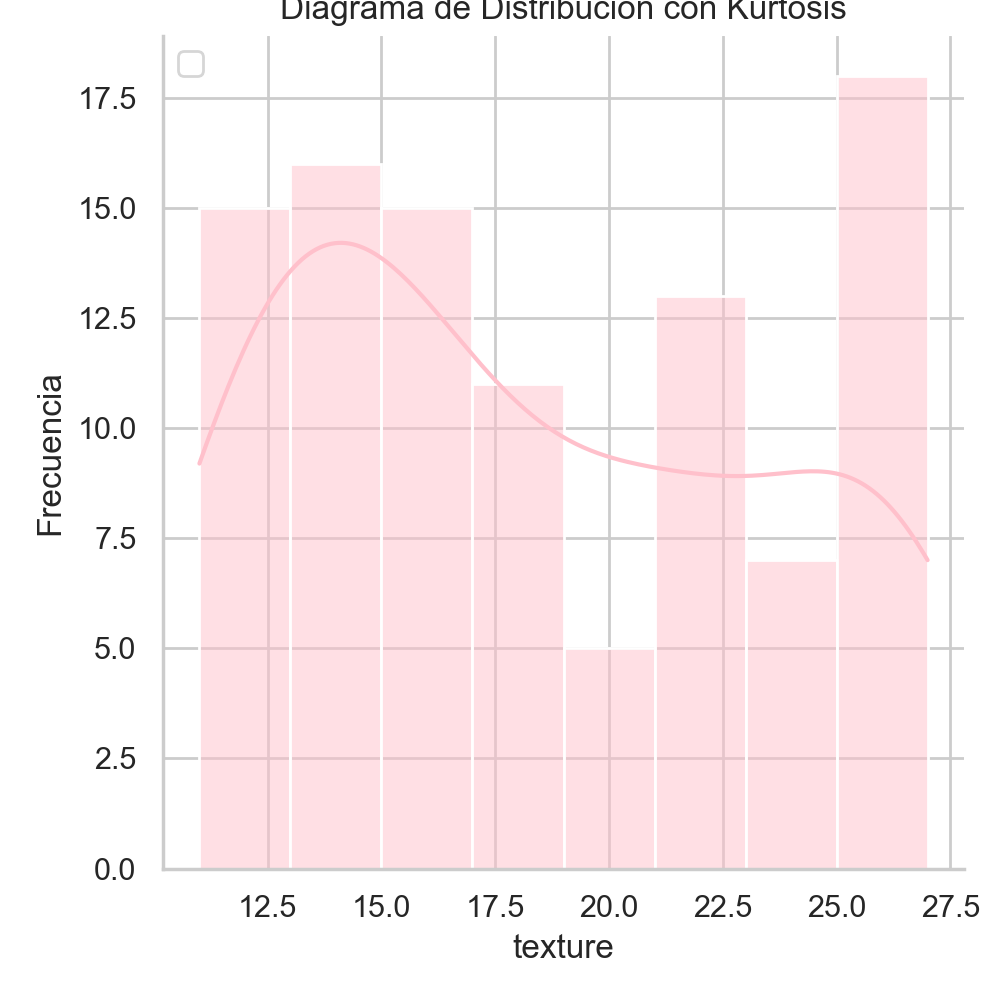

In [204]:
# Crear un diagrama de distribución (displot)
sns.set(style="whitegrid")
sns.displot(asime['texture'], kde=True, color='pink')

plt.xlabel('texture')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Distribución con Kurtosis')
plt.legend()
plt.show()

<div style="color:#d3ac44"><h2>Medidas de dispersión.</h2></div>

> Las medidas de dispersión, también conocidas como medidas de variabilidad o de dispersión de datos, son estadísticas que indican la extensión o distribución de los valores en un conjunto de datos. Estas medidas proporcionan información sobre la variabilidad de los valores individuales con respecto a alguna medida de tendencia central, como la media o la mediana.

In [205]:
# Calcula la desviación media utilizando NumPy
desviacion_media = np.mean(np.absolute(asime['texture'] - np.mean(asime['texture'])))

print("Desviación Media:", desviacion_media)

Desviación Media: 4.5222


In [206]:
# Otra forma de Calcular las desviación Media.
md = asime['texture'].mad()
md

C:\Users\samir\AppData\Local\Temp\ipykernel_11460\2891506000.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.


4.5222

**Varianza:** La varianza es una medida que indica cuánto se dispersan los valores individuales de un conjunto de datos con respecto a la media. Se calcula sumando los cuadrados de las desviaciones individuales de cada valor con respecto a la media y luego dividiendo esta suma entre el número total de valores. La varianza es especialmente útil para comprender la variabilidad y la dispersión de los valores en el conjunto de datos.

In [207]:
# Calcula la varianza
varianza = np.var(asime['texture'])
varianza

26.69709999999998

**Coeficiente de Variación:** El coeficiente de variación es una medida relativa de la dispersión que compara la desviación estándar (o la raíz cuadrada de la varianza) con la media. Se expresa como un porcentaje y es útil para comparar la variabilidad entre diferentes conjuntos de datos, independientemente de su escala. Si el coeficiente de variación es bajo, indica que la variabilidad es pequeña en relación con la media, mientras que un coeficiente de variación alto indica una variabilidad relativamente grande en comparación con la media.

In [208]:
# Calcula la desviación estándar (raíz cuadrada de la varianza)
desviacion_estandar = np.sqrt(varianza)

# Calcula la media
media = np.mean(asime['texture'])

# Calcula el coeficiente de variación
coeficiente_variacion = (desviacion_estandar / media) * 100

print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_estandar)
print("Coeficiente de Variación:", coeficiente_variacion)

Varianza: 26.69709999999998
Desviación Estándar: 5.166923649522991
Coeficiente de Variación: 28.342971198699896


**La dispersión** se trata de cuán dispersos o extendidos están los valores en un conjunto de datos. Si los valores están cercanos entre sí, la dispersión es baja y los datos son más consistentes. Si los valores están muy separados, la dispersión es alta y los datos son más variados o menos predecibles. En resumen, la dispersión nos dice cuánto los valores se esparcen alrededor de un valor central, como la media o la mediana.

In [209]:
# La Variable resultado Benigno (B) sugiere que los valores de "texture" tienen más dispersión o variabilidad en comparación con el valor más bajo
(Df_diabete
 .groupby("diagnosis_result")
 .agg(texture_sd=("texture", "std")))

,texture_sd
diagnosis_result,
B,5.185396
M,5.218950


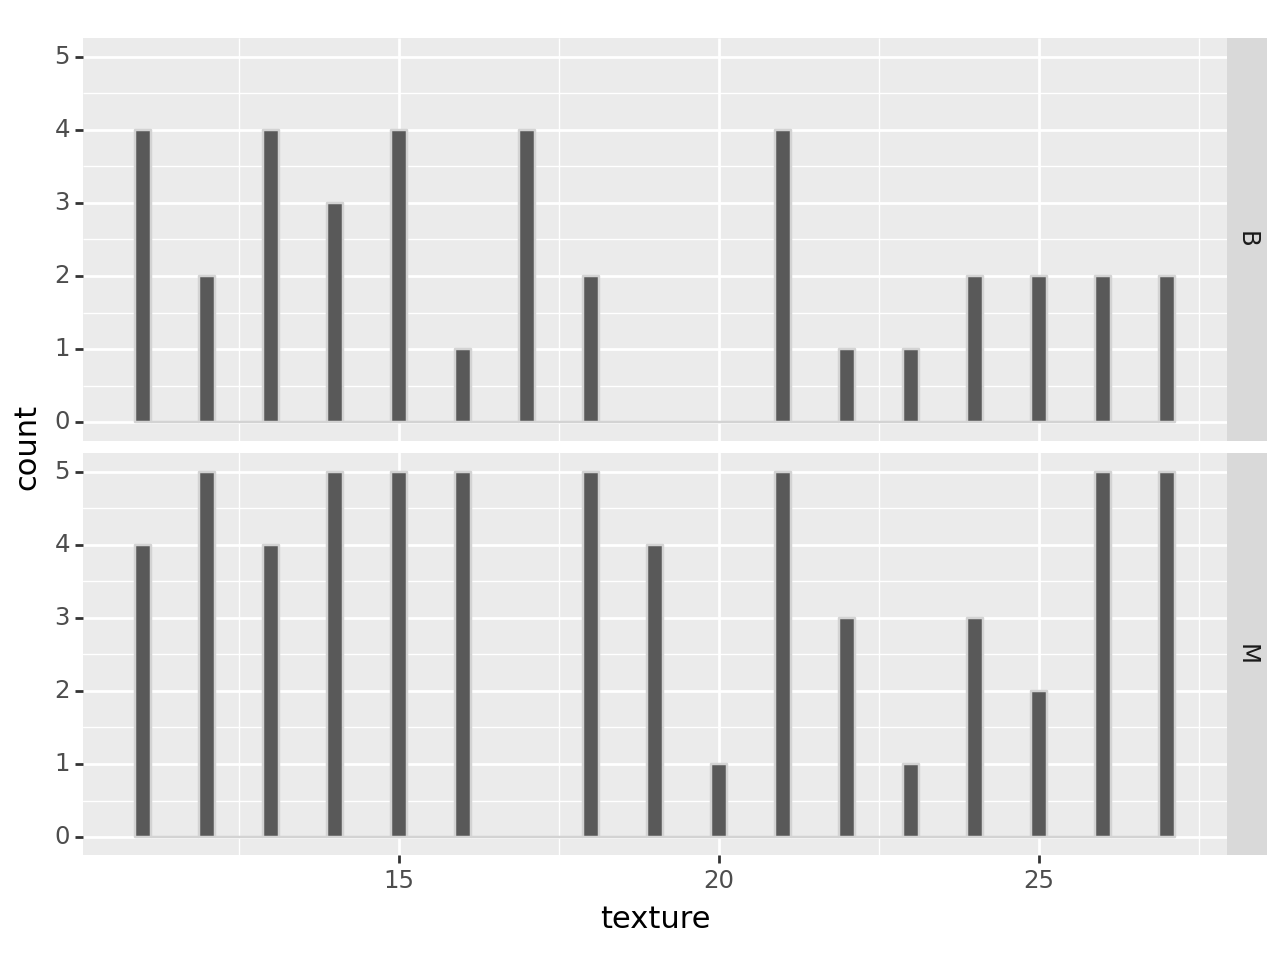

<Figure Size: (640 x 480)>

In [210]:
# Crear un histograma para visualizar la distribución
(ggplot(Df_diabete) +
  geom_histogram(aes(x="texture"), binwidth=0.25, colour='lightgrey') +
  facet_grid("diagnosis_result ~ ."))


**La covarianza** es una medida estadística que indica cómo dos variables cambian juntas. En otras palabras, mide si las dos variables tienden a aumentar o disminuir al mismo tiempo. Una covarianza positiva indica que las variables tienden a aumentar juntas, mientras que una covarianza negativa indica que una variable tiende a aumentar cuando la otra disminuye.

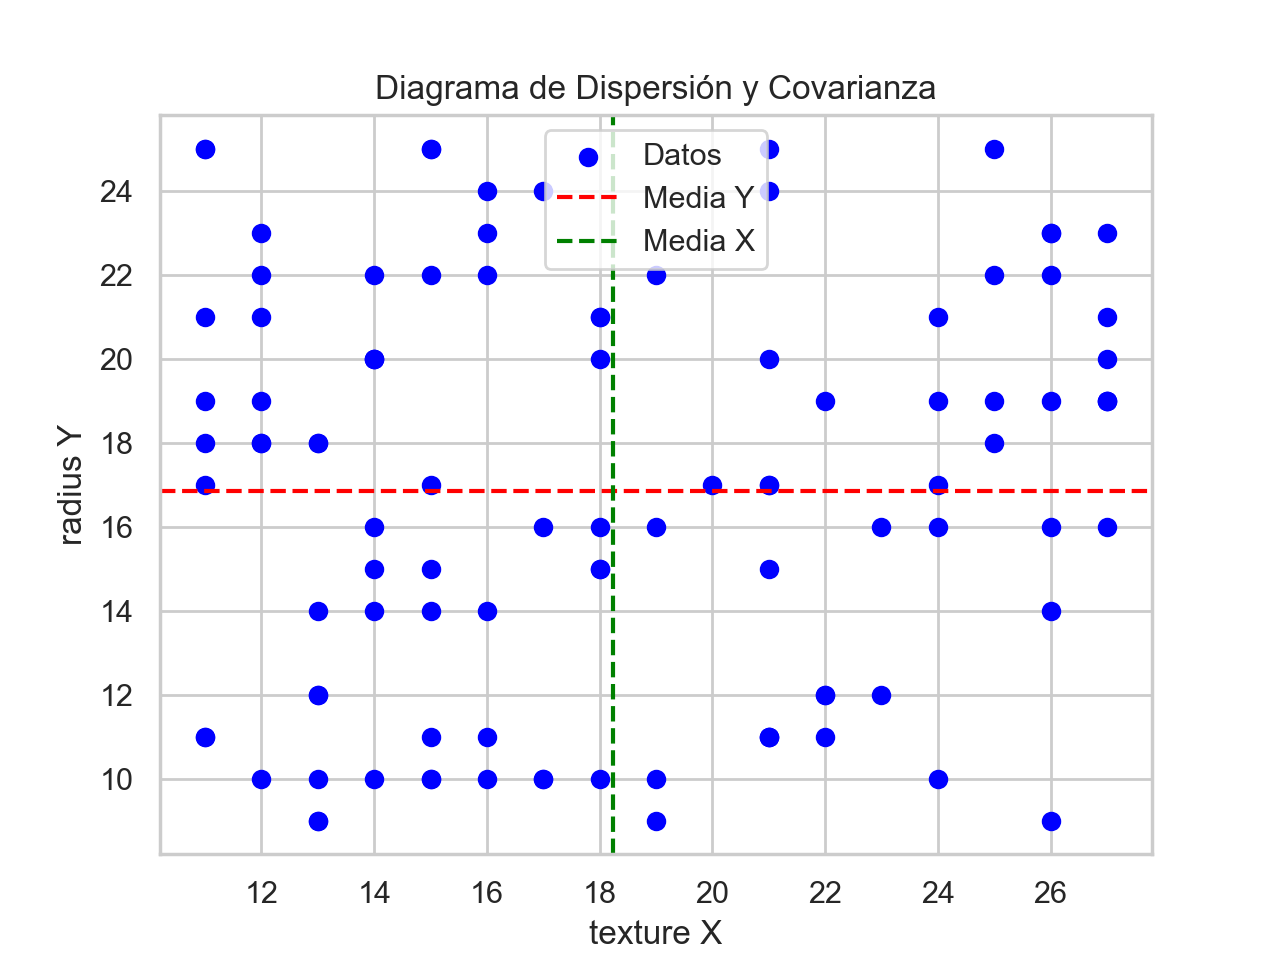

In [211]:
# Graficar el scatter plot
plt.scatter(Df_diabete['texture'], Df_diabete['radius'], color='blue', label='Datos')
plt.axhline(Df_diabete['radius'].mean(), color='red', linestyle='dashed', label='Media Y')
plt.axvline(Df_diabete['texture'].mean(), color='green', linestyle='dashed', label='Media X')
plt.xlabel('texture X')
plt.ylabel('radius Y')
plt.title('Diagrama de Dispersión y Covarianza')
plt.legend()
plt.show()

# Cálculo de la covarianza en python
En python, utilizamos el método cov para calcular la matriz de varianzas y covarianzas de las variables numéricas de un DataFrame. Si luego queremos una covarianza en particular, podemos utilizar .loc con los nombres de las variables que nos interesan.

In [212]:
# Cálculo de la covarianza
cov_mat = asime.cov()
cov_mat

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,841.666667,6.691919,7.873737,-148.333333,-1617.181818,-0.109732,-0.492343,-0.198571,-0.039005
radius,6.691919,23.805556,2.539899,-27.518182,-391.432323,-0.009081,-0.057126,-0.005964,-0.001158
texture,7.873737,2.539899,26.966768,-13.948889,-188.810505,0.007780,0.010302,0.012455,0.005890
perimeter,-148.333333,-27.518182,-13.948889,560.557172,7392.741010,0.093405,0.763691,0.142523,-0.037715
area,-1617.181818,-391.432323,-188.810505,7392.741010,102215.056162,0.975725,8.307034,1.086940,-0.714926
smoothness,-0.109732,-0.009081,0.007780,0.093405,0.975725,0.000214,0.000417,0.000191,0.000044
compactness,-0.492343,-0.057126,0.010302,0.763691,8.307034,0.000417,0.003739,0.001282,0.000323
symmetry,-0.198571,-0.005964,0.012455,0.142523,1.086940,0.000191,0.001282,0.000948,0.000143
fractal_dimension,-0.039005,-0.001158,0.005890,-0.037715,-0.714926,0.000044,0.000323,0.000143,0.000066


In [213]:
# cálculo de la varianza con base en la variable petal_length sobre la variable petal_width
cov_mat.loc["texture", "radius"]

2.539898989898989